### i190597 CS-C

In [4]:
import random
import numpy as np
from matplotlib import pyplot as plt

### Function to Draw Polygon

In [5]:

def draw_polygon(ax, n):
    points = []
    x = np.random.randint(0, 254, n)
    y = np.random.randint(0, 254, n)

    points = tuple(zip(x, y))
    points = np.array(points)

    #print("Points in the polygon ",points)
    
    center_point = [np.sum(x) / n, np.sum(y) / n]
    angles = np.arctan2(x - center_point[0], y - center_point[1])

    #sorting the points to ensure no intersecting edges:
    sort_tups = sorted([(i, j, k) for i, j, k in zip(x, y, angles)], key=lambda t: t[2])

    #making sure that there are no duplicates:
    if len(sort_tups) != len(set(sort_tups)):
        raise Exception('two equal coordinates -- exiting')

    x, y, angles = zip(*sort_tups)
    x = list(x)
    y = list(y)

    #appending first coordinate values to lists:
    x.append(x[0])
    y.append(y[0])

#    fig, ax = plt.subplots()

    ax.plot(x, y, label='{}'.format(n))

    return points


### Function to generate a single chromosome 

In [6]:
def chromosome_generation(points):
    encoded = []
    for row in points:
        for cell in row:
            x = bin(cell).replace("0b", "")
            while len(x) < 8:
                x += '0'
            encoded.append(x)
    encoded = list(map(int, encoded))

    while len(x) < 8:
        x += '0'

    #print("Binary encoded chromosome ", encoded)
    chromosome = []
    chromo = int("".join(map(str, encoded)))
    chromosome.append(chromo)
    return chromosome


### Function to generate population 

In [7]:
def population_generation(nvertices):
    population = []
    for i in range(0, 50):
        points = draw_polygon(ax, n)
        decimal_population.append(points)

        chromosom = chromosome_generation(points)
        population.append(chromosom)
    
    #print("Population of chromosomes: ",population)
    return population


### Function to find number of convex edges (fitness) of a chromosome

In [8]:
def CrossProduct(A):
    # Stores coefficient of X 
    X1 = (A[1][0] - A[0][0])
    # Stores coefficient of Y 
    Y1 = (A[1][1] - A[0][1])
    # Stores coefficient of X direction of vector A[2]A[0]
    X2 = (A[2][0] - A[0][0])
    # Stores coefficient of Y direction of vector A[2]A[0]
    Y2 = (A[2][1] - A[0][1])
    #cross product
    return (X1 * Y2 - Y1 * X2)

def isConvex(points):
    fitness_value = 0
    # Stores count of edges
    N = len(points)
    prev = 0

    for i in range(N):
        temp = [points[i], points[(i + 1) % N],
                points[(i + 2) % N]]

        curr = CrossProduct(temp)
        if (curr != 0):
            # If direction of cross product of all adjacent edges are not same
            if (curr * prev < 0):
                return fitness_value
            if (curr * prev >= 0):
                prev = curr
                fitness_value += 1
    return fitness_value

### Function to find fitness of a single chromosome

In [9]:
def fitness_function(chromosome):
    chromosome = list(chromosome)
    fitness_value_of_one=isConvex(chromosome)
    return fitness_value_of_one

### Function to find fitness of entire population

In [10]:
def calculate_fittness_of_population(decimal_population):
    decimal_population = list(decimal_population)
    fittness_score = []
    fittness_temp = []
    size = len(decimal_population)
    for i in range(size):
        # propability according to fitness function
        chromosome = decimal_population[i].copy()
        chromosome = list(chromosome)

        fittness_temp.append(fitness_function(chromosome))

    for i in range(size):
        chromosome = decimal_population[i].copy()

        prob = (fitness_function(chromosome) / sum(fittness_temp))
        prob2 = prob * 100
        fittness_score.append(prob2)

    return fittness_score


### Function to find two fittest individuals of a population

In [11]:
def find_two_fittest_individuals(population, fittness_score):
    fittest_individuals=[]
    copy_of_fitness_values = fittness_score[:]

    largest_fitness = max(copy_of_fitness_values)
    #print("Largest fitness ",largest_fitness)
    fittest_individuals.append(largest_fitness)
    copy_of_fitness_values.remove(largest_fitness)

    second_largest_fitness = max(copy_of_fitness_values)
    #print("Second largest fitness ",second_largest_fitness)
    fittest_individuals.append(second_largest_fitness)
    return fittest_individuals


### Function to find parents based upon fitness value

In [12]:
def parent_selection_RW(fittness_score, decimal_population):
    #print("MAi yahan hu",fittness_score)
    parents = []
    sum_fitt_score = sum(fittness_score)
    size = len(decimal_population)
    pick = random.uniform(0, sum_fitt_score)
    current = 0
    for chromosome in range(size):

        current += fittness_score[chromosome]
        if current < pick:
            # need to make changes here !!
            parents.append(decimal_population[chromosome])
    return parents


### Crossover to generate children

In [13]:
def crossover(population, parents):

    #print("PRinting pop ulation ", len(population))
    #print("Printing parents ",parents)
    chromosome_representation_pop = []
    size_of_pop = len(population)
    for i in range(size_of_pop):
        chromosome_representation_pop.append(chromosome_generation(population[i]))

    chromosome_representation_prnts = []
    size_of_par = len(parents)
    for i in range(size_of_par):
        chromosome_representation_prnts.append(chromosome_generation(population[i]))

    # Making the new states
    crossovered_gen = []
    #print("Chromosomes of parents", chromosome_representation_prnts)
    for i in range(len(parents)):
        newchromosomeA = chromosome_representation_prnts[i][:i+3]
        if (i + 1 < len(parents)):
            newchromosomeB = chromosome_representation_prnts[i][i+3:]

            finalchromosome = newchromosomeA + newchromosomeB
            crossovered_gen.append(finalchromosome)

    #print("Printing returned values after crossover ",crossovered_gen)
    if parents==crossovered_gen:
        print("Crossover failed")
        return
    return crossovered_gen


### Mutation of crossovered generation

In [14]:
def mutation(crossovered_gen, population_size):
    #print(population_size)
    for i in range(0,population_size):
    # random selection of gene position that needs to be changes
        index_of_gene = random.randint(0, population_size - 5)
        #print("Index of gene",index_of_gene)
        # random selection of gene value that needs to be changed
        new_gene = random.randint(0, population_size - 5)
        #print("new gene",new_gene)
        crossovered_gen[index_of_gene] = crossovered_gen[new_gene]
    return crossovered_gen


### Genetic Algorithm

In [15]:
def GA(population, max_gen,n):
    
    index = 0
    while (index < max_gen):
        print("-----------------GENERATION ",index ,"---------------")
        #points = draw_polygon(ax, n)
        #chromosom = chromosome_generation(points)

        fitness_without_probability = []
        population = population_generation(n)
        for i in decimal_population:
            fitness_without_probability.append(fitness_function(i))

        print("--------Fitness values using fitness_function--------", fitness_without_probability)

        parents_fitness_values = []
        fittness_score = (calculate_fittness_of_population(decimal_population))
        #print("--------Fitness scores using probability, list-------- ", calculate_fittness_of_population(decimal_population))
        print("--------The two fittest kids-------- ", find_two_fittest_individuals(population, fittness_score))
        parents_fitness_values.append(parent_selection_RW(fittness_score, decimal_population))
        #print("--------Parent selection by roulette wheel-------- ", parent_selection_RW(fittness_score, decimal_population))
        crossovered_gen = crossover(decimal_population, parent_selection_RW(fittness_score, decimal_population))
        population_size = len(crossovered_gen)
        mutated_gene = mutation(crossovered_gen, population_size)
        #print("--------After mutation-------- ", mutated_gene)
        fittest_individual=max(fittness_score)
        print("--------Fittest indvidual of generation ",index ,"has fitness value ",fittest_individual, "-------- ")
        fittest_without_probability=max(fitness_without_probability)
        #print("Fittest mai hu",fittest_without_probability)
        count=0

        for i in range(0,len(fitness_without_probability)):
            if fittest_without_probability==n:
                fig, ax = plt.subplots()
                points = draw_polygon(ax, n)
                chromosom = chromosome_generation(points)
                count+=1
        print(count) 
        index+=1


KeyboardInterrupt: Interrupted by user

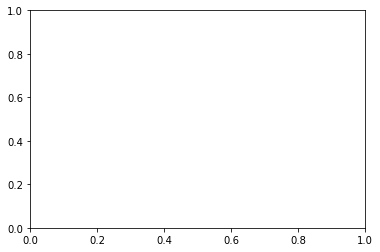

In [16]:
if __name__ == "__main__":
    fig, ax = plt.subplots()
    n = input("--------------Enter number of vertices of the polygon-----------")
    n = int(n)
    max_gen = input("--------------Enter number of vertices of generations-----------")
    max_gen = int(max_gen)
    population=population_generation(n)
    GA(population, max_gen,n)
       
    